# Machine Learning LAB 3
# IMAGE CLASSIFICATION WITH NEURAL NETWORKS
Course 2022/23: P. Zanuttigh, F. Barbato, M. Mel

The notebook contains some simple tasks to be performed with **NEURAL NETWORKS (NNs)**. <br>
Complete all the **required code sections** and **answer to all the questions**. <br>

### IMPORTANT for the evaluation score:
1. **Read carefully all cells** and **follow the instructions**
2. **Re-run all the code from the beginning** to obtain the results for the final version of your notebook, since this is the way we will do it before evaluating your notebooks.
3. Make sure to fill the code in the appropriate places **without modifying the template**, otherwise you risk breaking later cells.
4. Please **submit the jupyter notebook file (.ipynb)**, do not submit python scripts (.py) or plain text files. **Make sure that it runs fine with the restat&run all command**.
5. **Answer the questions in the appropriate cells**, not in the ones where the question is presented.

# Clothes Classification with Neural Networks

In this notebook we are going to explore the Neural Networks for image classification. We are going to use [**Fashion MNIST**](https://github.com/zalandoresearch/fashion-mnist), a dataset of small images of clothes and accessories.

The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [1]:
# load the required packages and check Scikit-learn version
%matplotlib inline  

import numpy as np
from matplotlib import pyplot as plt

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearnex import patch_sklearn # if you have an Intel CPU and have installed the Intel MKL 
patch_sklearn()                     # library: you can uncomment these lines for a speedup

scikit-learn version:  1.0.2


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

Place your **name** and **ID number** (matricola) in the cell below. <br>
Also recall to **save the file as Surname_Name_LAB3.ipynb**

**Student name**: Riccardo Tancredi<br>
**ID Number**: 2089395

# A) Hyperparameter Search

**TO DO A.0:** **Set** the random **seed** using your **ID**. If you need to change it for testing add a constant explicitly, eg.: `ID = 1234567 + 1`.

In [3]:
ID = 2089395
np.random.seed(ID)

Before proceding to the training steps, we **load the dataset**. <br>
The **split** is **performed after applying a random permutation** to the dataset, such permutation will **depend on the seed** you set above.<br><br>
**DO NOT CHANGE THE PRE-WRITTEN CODE UNLESS OTHERWISE SPECIFIED**

In [4]:
# load the MNIST dataset
X, y = load_mnist("data")
print("Number of samples in the MNIST dataset:", X.shape[0])
# rescale the data to [0, 1]
X = X / 255.0

Number of samples in the MNIST dataset: 60000


**TO DO A.1:** **Divide** the **data into training and test set** using a **500** samples in the **training set**. <br>
Make sure that **each label** is present at **least 10 times** in training frequencies.

In [5]:
# randomly permute the data and split into training and test taking 
# the first 500 data samples as training and the rests as test

m_training = 500

# To make sure that each label is present at least 10 times:
more_than_10 = True
while more_than_10:
    permutation = np.random.permutation(X.shape[0])    # random permutation
    y_trial = y[permutation]
    y_train = y_trial[:m_training]
    labels, freqs = np.unique(y_train, return_counts=True)
    if sum(freqs>10) == freqs.shape[0]:
        more_than_10 = False
        
X = X[permutation]
y = y[permutation]

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [45 67 44 38 46 41 54 52 49 64]


In [6]:
# function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


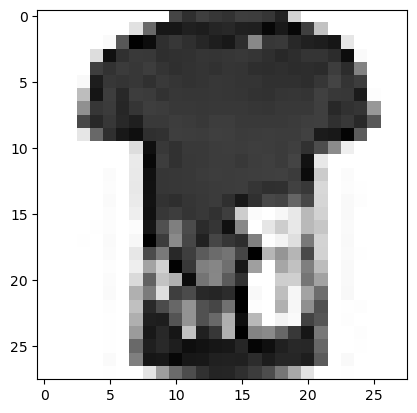

LABEL: 0
INPUT:


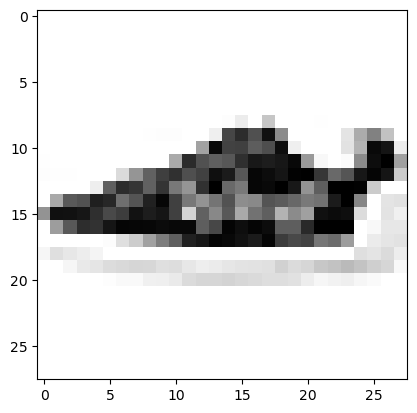

LABEL: 7
INPUT:


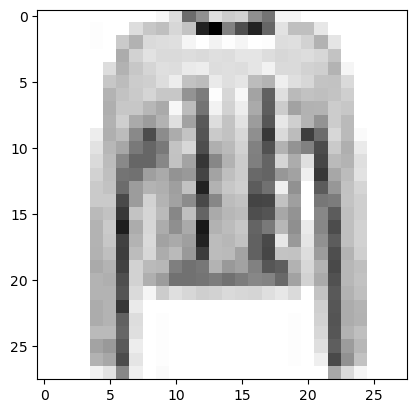

LABEL: 2


In [7]:
# let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,10000)

**TO DO A.2** Now **use a feed-forward Neural Network** for prediction. <br><br>
Use the **multi-layer perceptron** classifier, with the following parameters: <br>
`max_iter=250, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID` <br>
The `random_state` parameter ensures the run is the same even if you run it more than once, while the `alpha` parameter is the regularization term.<br>
You might get some **warnings about the convergence**, ignore them (or try to increase the max_iter parameter if you have a powerful computer). <br>

Then, using the default activation function, **pick four or five architectures** to consider, with different numbers of hidden layers and different sizes. <br>
It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 100. <br>
Evaluate the architectures you chose using **GridSearchCV with cv=5**. <br>

You can reduce the number of iterations if the running time is too long on your computer.

In [8]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (25,), (50,), (75,), (25,10,), (50,25,10)]}

mlp = MLPClassifier(max_iter=400, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID)
# max_iter was increased only to avoid warnings about the convergence

mlp_arch_CV = GridSearchCV(estimator=mlp, param_grid=parameters, cv=5)
mlp_arch_CV.fit(X_train, y_train)

print ('RESULTS FOR NN\n')
print("Best parameters set found:")
best_params = mlp_arch_CV.best_params_
print(best_params)

print("Score with best parameters:")
best_score = mlp_arch_CV.best_score_       
print(best_score)

print("\nMean scores on the grid:")
mlp_arch_CV.cv_results_['mean_test_score']

RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (75,)}
Score with best parameters:
0.756

Mean scores on the grid:


array([0.588, 0.738, 0.738, 0.756, 0.566, 0.37 ])

**TO DO A.3** Now **try different batch sizes**, while keeping the **best NN** architecture you have found above. <br>
Remember that the batch size was previously set to the default value, i.e., `min(200, n_samples)`. <br>

Recall that a **batch size of 1 corresponds to baseline SGD**, while using all the **400 training samples** (there are 500 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to **standard GD** and using a different mini-batch size lies in the middle between the two extreme cases.

In [9]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [100, 200, 400]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)   # suggestion: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
best_hidden_layer_sizes = best_params   # {'hidden_layer_sizes': (75,)}
mlp = MLPClassifier(hidden_layer_sizes=best_hidden_layer_sizes['hidden_layer_sizes'], max_iter=250, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID)

# recall to use cv=kf to use the k-fold subdivision seen in the lectures
mlp_batch_CV = GridSearchCV(estimator=mlp, param_grid=parameters, cv=kf)
mlp_batch_CV.fit(X_train, y_train)

print ('RESULTS FOR NN\n')
print("Best parameters set found:")
best_params_1 = mlp_batch_CV.best_params_
print(best_params_1)

print("Score with best parameters:")
best_score_1 = mlp_batch_CV.best_score_
print(best_score_1)

print("\nAll scores on the grid:")
mlp_batch_CV.cv_results_['mean_test_score']

RESULTS FOR NN

Best parameters set found:
{'batch_size': 100}
Score with best parameters:
0.75

All scores on the grid:


array([0.75 , 0.74 , 0.744])

**TO DO A.Q1**

- What do you observe for different architectures and batch sizes? <br>
- How do the number of layers and their sizes affect the performances? <br>
- What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

<div class="alert alert-block alert-info">

**ANSWER A.Q1**:<br>
By changing the architecture of the network and the batch sizes the performance of the classification remains approximately the same ~$75\%$, even though the number of layers and their sizes affect the performances. When the number of hidden layers is high, the performance drops, reaching scores around ~$40\%$: a smaller number of hidden layers is preferred. 

The batch size has a crucial role too: for small batch sizes ($<20$) the algorithm give back really low scores; bigger batch sizes score better, but the highest value ($400$) is not always the best one. The best score depends on the hidden layer size variable too; but once that a certain threshold of the batch size is passed, the performance remains around ~$75\%$ and saturate.
  
</div>

**TO DO A.4** Now **try** to use **different learning rates**, while keeping the **best NN architecture and batch size you have found above.** <br>
**Plot the learning curves** (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. <br>
You might get warnings about the convergence, this is expected. Ignore them.

In [10]:
# import warnings
# warnings.filterwarnings('ignore')

c:\Users\ricta\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\ricta\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


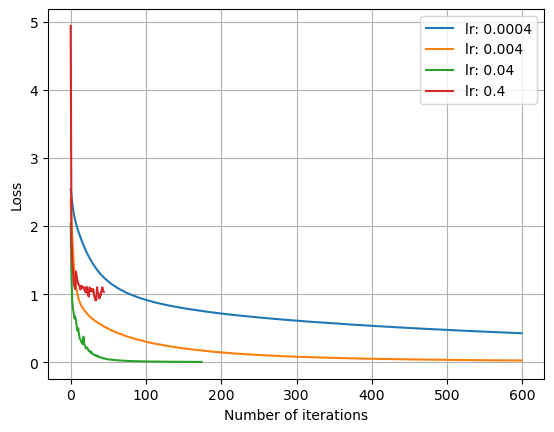

RESULTS FOR NN

Best parameters set found:
The best hidden layer size found is (75,) and the best batch size is 100
The best learning rate is 0.004
Score with best parameters:
1.0


In [11]:
lr_list = [4*10**exp for exp in range(-4,0)]
scores = {}

best_hidden_layer_sizes = best_params   # {'hidden_layer_sizes': (75,)}
best_batch_size = best_params_1  # {'batch_size': 100}

for lr in lr_list: 
    mlp = MLPClassifier(hidden_layer_sizes=best_hidden_layer_sizes['hidden_layer_sizes'], max_iter=600, 
                        alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=lr, random_state=ID, 
                        batch_size=best_batch_size['batch_size'])
    mlp.fit(X_train, y_train)
    scores[lr] = mlp.score(X_train, y_train)    # score on the test set
    plt.plot(mlp.loss_curve_, label='lr: ' + str(lr))

plt.legend(loc = 1)
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

print ('RESULTS FOR NN\n')
print("Best parameters set found:")
print(f"The best hidden layer size found is {best_hidden_layer_sizes['hidden_layer_sizes']} and the best batch size is {best_batch_size['batch_size']}")
# the best learning rate is
best_lr = list(scores.keys())[list(scores.values()).index(max(scores.values()))]
print(f"The best learning rate is {best_lr}")

print("Score with best parameters:")
print(scores[best_lr])

**Question A.Q2** Comment about the learning curves (i.e. the variation of the loss over the steps). <br>
How does the curve changes for different learning rates in terms of stability and speed of convergence ?

<div class="alert alert-block alert-info">

**ANSWER A.Q2**:<br>
The learning curves changes for different learning rates: by increasing the learning rate the convergence is reached faster, but with an higher loss and a noisier curve. Low learning rate require many interations to converge: the curve in blue ($lr=0.0004$) does not converge not even in $2000$ interations, but is the most stable.

After 500 interations the orange and the green curves ($lr=0.004$ and $lr=0.04$ respectively) produce the same result, with the only difference, as mentioned, that the higher $lr$ has a noisier curve, but convergent in less interations.   
    </div>

**TO DO A.5** Now get **training and test error** for a NN with best parameters (architecture, batch size and learning rate)from above. Plot the learning curve also for this case. <br>
As before, you might get a convergence warning, you can safely ignore it.

c:\Users\ricta\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



RESULTS FOR BEST NN

Best NN training error: 0.004000
Best NN test error: 0.215714


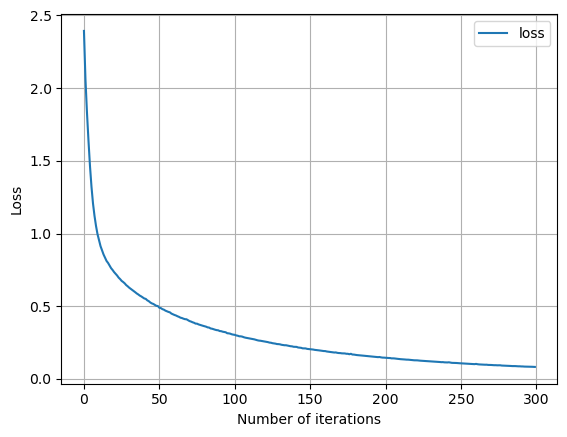

In [12]:
#get training and test error for the best NN model from CV
mlp = MLPClassifier(hidden_layer_sizes=best_hidden_layer_sizes['hidden_layer_sizes'], max_iter=300, 
                    alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=best_lr, random_state=ID, 
                    batch_size=best_batch_size['batch_size'])
mlp.fit(X_train, y_train)

training_error = 1 - mlp.score(X_train, y_train)
test_error = 1 - mlp.score(X_test, y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

plt.plot(mlp.loss_curve_, label="loss")
plt.legend(loc = 1)
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

## B) More data 
Now let's do the same but **using 20000** (or less if it takes too long on your machine) **data points for training**. <br>
Make sure you are **consistent with the choice of `m_training`** in this and the later cells. <br>
Use the **same NN architecture** as before, but you can try more if you like and have a powerful computer!!

In [13]:
X = X[permutation]
y = y[permutation]

m_training = 20000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [2025 1979 1959 2046 1982 1975 2045 2043 1971 1975]


**TO DO B.1** Train the NNs with the added data points using the optimum parameters found above. <br>
Eventually, feel free to try different architectures if you like. <br>
We suggest that you use `verbose=True` to have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50). <br>
This is just for debug purposes, **remember to switch it off** once you found a setup you like. <br>
As before, you might get a convergence warning (especially if you reduced the number of iterations), you can safely ignore it.

In [14]:
mlp_large = MLPClassifier(hidden_layer_sizes=best_hidden_layer_sizes['hidden_layer_sizes'], max_iter=250, 
                        alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=best_lr, random_state=ID, 
                        batch_size=best_batch_size['batch_size'], verbose=False)
mlp_large.fit(X_train, y_train)

print ('\nRESULTS FOR NN\n')

#get training and test error for the NN
training_error = 1 - mlp_large.score(X_train, y_train)
test_error = 1 - mlp_large.score(X_test, y_test)
print ("NN training error: %f" % training_error)
print ("NN test error: %f" % test_error)

c:\Users\ricta\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



RESULTS FOR NN

NN training error: 0.016350
NN test error: 0.129275


**Question B.Q1** Compare the train and test error you got with a large number of samples with the best one you obtained with only 500 data points. Comment about the results you obtained.

<div class="alert alert-block alert-info">

**ANSWER B.Q1**:<br>
The training error is approximately bigger, as expected since the train is made with more data. The test error is instead smaller, as expected since we have trained the algorithm with more training samples. 

</div>

**TO DO B.2** Plot an example that was missclassified by NN with m=500 training data points and it is now instead correctly classified by NN with m=20000 training data points.

INPUT:


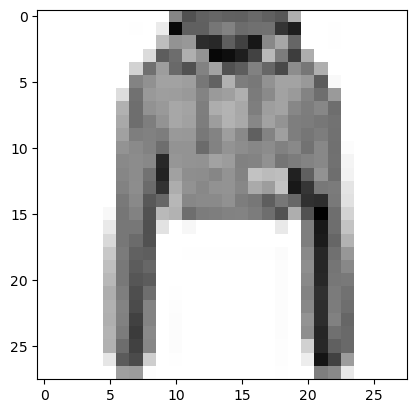

LABEL: 2
NN prediction for m=500: 4
NN prediction for m=20000: 2


In [15]:
NN_prediction = mlp.predict(X_test)
large_NN_prediction = mlp_large.predict(X_test)

for i, (p, pl, l) in enumerate(zip(NN_prediction, large_NN_prediction, y_test)):
    if p != l and pl == l:
        plot_input(X_test, y_test, i)
        print("NN prediction for m=500:", p)
        print("NN prediction for m=20000:", pl)
        break

**TO DO B.3** Plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 500 data points and with 20000 data points. <br>
Note that the code is provided, you just need to change the `mlp` variable name to the one used before - if you changed it.  

Weights with 500 data points:


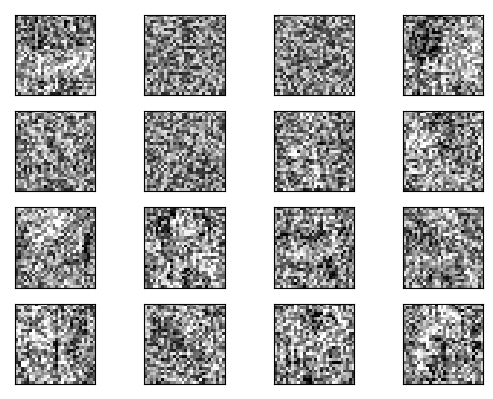

Weights with 20000 data points:


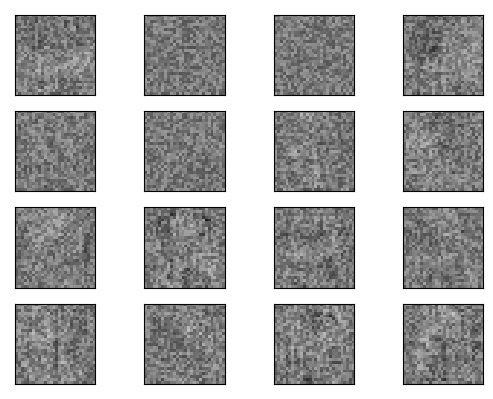

In [16]:
print("Weights with 500 data points:")
fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 20000 data points:")
fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp_large.coefs_[0].min(), mlp_large.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

**Question B.Q2** Describe what do you observe by looking at the weights

<div class="alert alert-block alert-info">

**ANSWER B.Q2**:<br>
By looking at the weights it is clear that with more training data we can observe a wider gradient of tonality of grays: the two variables ($vmin$ and $vmax$) increase in absolute value. 
    </div>

**TO DO B.4** Create a SVM classifier with the following parameters: `kernel='rbf', C=10, gamma=0.01`. <br>
Fit it on a few data points and compute its training and test scores.

In [17]:
m_training = 300

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

# best parameters found in the SVM notebook
SVM = GridSearchCV(SVC(probability=True, random_state=ID), param_grid={'C': [10], 'kernel':['rbf'], 'gamma': [0.01]}, cv = 4)
SVM.fit(X_train, y_train)

print ('RESULTS FOR SVM')
SVM_training_error = 1 - SVM.score(X_train, y_train)

print("Training score SVM:")
print(SVM_training_error)

SVM_test_error = 1 - SVM.score(X_test, y_test)
print("Test score SVM:")
print(SVM_test_error)

RESULTS FOR SVM
Training score SVM:
0.0
Test score SVM:
0.22368509212730314


**Question B.Q3** Compare the results of SVM and of NN. Which one achieves the best performances? 

<div class="alert alert-block alert-info">

**ANSWER B.Q3**:<br>
Both Support Vector Machines and Neural Networks produce good results, very close to each other. Neural Networks shows for both the testing and the training data a smaller error value, which is still comparable with the one obtained with Support Vector Machines. 
Since in this case we are dealing with a huge dataset, Neural Network is more suitable and still provides the best results.
</div>